# Project: Wrangling and Analyze Data

In [282]:
#import required libraries
import pandas as pd
import numpy as np
import requests
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import seaborn as sns

%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. 
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [283]:
dog = pd.read_csv('twitter-archive-enhanced.csv')


In [284]:
dog.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [285]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', mode ='wb') as file:
    file.write(response.content)
    
image= pd.read_csv('image_predictions.tsv', sep='\t' )

In [286]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [287]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

# Get the API object which we will use to gather the twitter data
import tweepy

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [288]:
tweet_ids = dog.tweet_id.values
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149])

In [289]:
import time

# Query Twitter's API for the JSON data of each tweet ID in the Twitter archive
#index = 0
# dictionary to catch the errors
#error_dict = {}
#start = time.time()

# Save each tweet's returned JSON as a new line in a .txt file
#with open ('tweet_json.txt', 'w') as tweet_bk:
    # This will likely take 20 - 30 minutes to run because of Twitter's rate limit
 #   for tweet_id in tweet_ids:
  #      index += 1
   #     try:
            # Get the status data for each of the tweet IDs
    #        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
     #       print(str(index) + ": " + "ID - " + str(tweet_id))
            # Convert each tweet status to JSON string and save it in the tweet_bk file
      #      json.dump(tweet._json, tweet_bk)
            # recognize \n as a break of text
       #     tweet_bk.write("\n")
            
        # Catching errors that might occur while accessing the tweet data or content
        #except tweepy.error.TweepError as error:
         #   print(str(index) + ": " + "ID - " + str(tweet_id) + " has an error:", error.response.text)
            # Appending the errors to the dictionary; error_dict
          #  error_dict[tweet_id] = error
            
#end = time.time()
#print(end - start)

In [290]:
df = []
with open('extra.txt', 'r') as Json_file:
    for line in Json_file:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        create_date = tweet['created_at']
        df.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'create_date' : create_date,
                  'tweet_id' : tweet_id})
        
#saving the tweet-json.txt file into a dataframe called twitter_extra
tweet_json = pd.DataFrame(df, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'create_date'])


In [291]:
extra=tweet_json

In [292]:
extra

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017
5,891087950875897856,3261,20562,Sat Jul 29 00:08:17 +0000 2017
6,890971913173991426,2158,12041,Fri Jul 28 16:27:12 +0000 2017
7,890729181411237888,16716,56848,Fri Jul 28 00:22:40 +0000 2017
8,890609185150312448,4429,28226,Thu Jul 27 16:25:51 +0000 2017
9,890240255349198849,7711,32467,Wed Jul 26 15:59:51 +0000 2017


## Assessing Data
Here, I will use  assess the data for quality and tidiness issue.



In [293]:
dog.sample(12)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",12,10,Napolean,doggo,None,None,None
367,828770345708580865,NaN,NaN,2017-02-07 01:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alfie. He's your Lyft for tonight. Kindly requests you buckle pup and remain reasonably calm during the ride. 13/10 he must focus https://t.co/AqPTHYUBFz,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828770345708580865/photo/1,13,10,Alfie,None,None,None,None
1238,712097430750289920,NaN,NaN,2016-03-22 02:03:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I can't even comprehend how confused this dog must be right now. 10/10 https://t.co/8AGcQ4hIfK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712097430750289920/photo/1,10,10,None,None,None,None,None
735,781163403222056960,NaN,NaN,2016-09-28 16:07:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","We normally don't rate lobsters, but this one appears to be a really good lobster. 10/10 would pet with caution https://t.co/YkHc7U7uUy",NaN,NaN,NaN,https://twitter.com/dog_rates/status/781163403222056960/photo/1,10,10,None,None,None,None,None
1647,683828599284170753,NaN,NaN,2016-01-04 01:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Breathtaking pupper here. Should be on the cover of Dogue. Top-notch tongue. Appears considerably fluffy. 12/10 https://t.co/Eeh3yfdglS,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683828599284170753/photo/1,12,10,None,None,None,pupper,None
1923,674082852460433408,NaN,NaN,2015-12-08 04:27:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Sagitariot Baklava mix. Loves her new hat. 11/10 radiant pup https://t.co/Bko5kFJYUU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674082852460433408/photo/1,11,10,a,None,None,None,None
793,773547596996571136,NaN,NaN,2016-09-07 15:44:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chelsea. She forgot how to dog. 11/10 get it together pupper https://t.co/nBJ5RE4yHb,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773547596996571136/photo/1,11,10,Chelsea,None,None,pupper,None
617,796387464403357696,NaN,NaN,2016-11-09 16:22:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Snicku. He's having trouble reading because he's a dog. Glasses only helped a little. Nap preferred. 12/10 would snug well https://t.co/cVLUasbKA5,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/796387464403357696/photo/1,https://twitter.com/dog_rates/status/796387464403357696/photo/1",12,10,Snicku,None,None,None,None
2264,667538891197542400,NaN,NaN,2015-11-20 03:04:08 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10 https://t.co/IQTOMqDUIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667538891197542400/photo/1,9,10,a,None,None,None,None
1010,747461612269887489,NaN,NaN,2016-06-27 16:08:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never seen a shark hold another shark like this before. Must b

In [294]:
dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [295]:
dog.shape

(2356, 17)

In [296]:
dog[~dog.in_reply_to_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610513747968/photo/1,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [297]:
dog[~dog.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" re

In [298]:
dog[dog.rating_denominator!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [299]:
pd.set_option("max_rows", None)
dog.name.value_counts()


None              745
a                  55
Charlie            12
Oliver             11
Cooper             11
Lucy               11
Tucker             10
Lola               10
Penny              10
Winston             9
Bo                  9
the                 8
Sadie               8
Bailey              7
Daisy               7
Toby                7
Buddy               7
an                  7
Jax                 6
Jack                6
Rusty               6
Koda                6
Milo                6
Scout               6
Stanley             6
Oscar               6
Bella               6
Dave                6
Leo                 6
Louis               5
Alfie               5
Finn                5
Gus                 5
Oakley              5
Sunny               5
Phil                5
Sammy               5
very                5
George              5
Chester             5
Larry               5
Bentley             5
Hank                4
Carl                4
Bruce               4
Beau      

In [300]:
pd.options.display.max_colwidth = 1000
dog[dog.name=='a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a taco. We only rate dogs. Please o

In [301]:
image.sample(12)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1504,785170936622350336,https://pbs.twimg.com/media/CuV8yfxXEAAUlye.jpg,2,seat_belt,0.891193,False,Eskimo_dog,0.027494,True,Samoyed,0.019530,True
857,696877980375769088,https://pbs.twimg.com/media/CavO0uuWEAE96Ed.jpg,1,space_heater,0.206876,False,spatula,0.123450,False,vacuum,0.119218,False
1299,752519690950500352,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3,swing,0.999984,False,Labrador_retriever,0.000010,True,Eskimo_dog,0.000001,True
1059,714982300363173890,https://pbs.twimg.com/media/CewgnHAXEAAdbld.jpg,1,Brittany_spaniel,0.944376,True,beagle,0.025435,True,Ibizan_hound,0.009962,True
244,670465786746662913,https://pbs.twimg.com/media/CU35E7VWEAAKYBy.jpg,1,axolotl,0.611558,False,tailed_frog,0.186484,False,common_newt,0.078694,False
691,684200372118904832,https://pbs.twimg.com/media/CX7EkuHWkAESLZk.jpg,1,llama,0.681347,False,ram,0.120142,False,hog,0.043686,False
201,669682095984410625,https://pbs.twimg.com/media/CUswUBRUAAAahAo.jpg,1,Christmas_stocking,0.188397,False,studio_couch,0.086887,False,bookcase,0.082599,False
84,667502640335572993,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1,Labrador_retriever,0.996709,True,golden_retriever,0.001688,True,beagle,0.000712,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
441,674468880899788800,https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg,2,chow,0.526230,True,Pomeranian,0.283647,True,toy_poodle,0.067665,True


In [302]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [303]:
image.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [304]:
sum(image.jpg_url.duplicated())

66

In [305]:
image[image.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [306]:
extra.head()

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017


In [307]:
extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
create_date       2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [308]:
extra.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [309]:
extra.duplicated().sum()

0

In [310]:
extra.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
create_date       0
dtype: int64

In [311]:
# Get the number of unique values in the columns in our tweet_json data
extra.nunique()

tweet_id          2354
retweet_count     1724
favorite_count    2007
create_date       2354
dtype: int64

### Quality issues
#### twitter-archive-enhanced.csv
1. timestamp column not in datetime format

2. In the rating_denominator column, Some values are not 10

3. In some columns , 'None' is used instead of NaN

4. We have some invalid dog names such as 'a','an','just','one' etc.

5. columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and tweet_id are floats instead of string 

#### image-predictions.tsv

6. tweet id column are formatted as integers instead of strings
 
7. Duplicated jpg url in the jpg_url column

#### tweet.json

8. rename id to tweet_id


### Tidiness issues
#### twitter-archive-enhanced.csv
1. Columns doggo, floofer, pupper, puppo should be unpivoted

2. Our interest lies on “original tweets”.Any data in the retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id should be dropped.

#### image-predictions.tsv
3. Dog breeds, confidence level and tests  are sepearted in three columns


#### General
1. The three tables should be combined as one single dataset 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 



In [312]:
# Make copies of original pieces of data
dog_c= dog.copy()
image_c= image.copy()


In [313]:
extra_c = extra.copy()

### Issue #1: timestamp column not in datetime format

#### Define: Chnage timestamp column to a datetime format

#### Code

In [314]:
dog_c['timestamp']= pd.to_datetime(dog_c['timestamp'])

#### Test

In [315]:
dog_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue #2: In the rating_denominator column, Some values are not 10

#### Define 
Drop all columns that dont have a denominator value of 10

#### Code

In [316]:
dog_c.drop(dog_c[dog_c.rating_denominator!=10].index,inplace=True)

#### Test

In [317]:
dog_c[dog_c.rating_denominator!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3: In some columns , 'None' is used instead of NaN

#### Define 
Change None to NaN in columns name, doggo, floofer, pupper, puppo 

In [318]:
def replace(df, col):
    df[col].replace('None', np.NAN, inplace=True)

In [319]:
replace(dog_c,'name')
replace(dog_c,'doggo')
replace(dog_c,'floofer')
replace(dog_c,'pupper')
replace(dog_c,'puppo')

#### Test

In [320]:
dog_c['doggo'].value_counts()
dog_c['floofer'].value_counts()
dog_c['name'].value_counts()
dog_c['puppo'].value_counts()
dog_c['floofer'].value_counts()

floofer    10
Name: floofer, dtype: int64

### Issue #4: We have some invalid dog names such as 'a','an','just','one' etc.

#### Define 
Change the dog names a,an,just,one,not,old to NaN


In [321]:
def replace_value(df, col, value):
    df[col].replace(value, np.NAN,inplace = True)


In [322]:
replace_value(dog_c,'name','just')
replace_value(dog_c,'name','a')
replace_value(dog_c,'name','one')
replace_value(dog_c,'name','not')
replace_value(dog_c,'name','this')
replace_value(dog_c,'name','old')

I just figured out that all invalid names begin with lower case , so i will right a list comprehension to get all of them

In [323]:
invalid = []
invalid = [x for x in dog_c.name if isinstance(x, str) and x.islower() and x not in invalid]


In [324]:
invalid

['such',
 'quite',
 'quite',
 'quite',
 'incredibly',
 'mad',
 'an',
 'very',
 'very',
 'my',
 'his',
 'an',
 'very',
 'actually',
 'getting',
 'mad',
 'very',
 'unacceptable',
 'all',
 'infuriating',
 'an',
 'very',
 'getting',
 'the',
 'the',
 'actually',
 'by',
 'officially',
 'the',
 'the',
 'life',
 'light',
 'space',
 'the',
 'an',
 'the',
 'quite',
 'an',
 'the',
 'the',
 'an']

In [325]:
# Replace the names that start with lower case with the word "None
dog_c.name.replace(invalid, np.NAN, inplace=True)

#### Test

In [326]:
dog_c[dog_c.name=='one']
dog_c[dog_c.name=='just']
dog_c[dog_c.name=='a']
dog_c[dog_c.name=='not']
dog_c[dog_c.name=='this']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [327]:
dog_c.name.value_counts()

Charlie           12
Cooper            11
Lucy              11
Oliver            11
Penny             10
Lola              10
Tucker            10
Winston            9
Bo                 9
Sadie              8
Daisy              7
Buddy              7
Bailey             7
Toby               7
Scout              6
Jax                6
Stanley            6
Dave               6
Leo                6
Milo               6
Oscar              6
Bella              6
Jack               6
Koda               6
Rusty              6
George             5
Phil               5
Chester            5
Sammy              5
Finn               5
Oakley             5
Gus                5
Larry              5
Louis              5
Sunny              5
Bentley            5
Alfie              5
Carl               4
Luna               4
Walter             4
Clarence           4
Bruce              4
Riley              4
Duke               4
Loki               4
Sampson            4
Ruby               4
Brody        

### Issue #5: columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and tweet_id are floats instead of string 

#### Define
Change the datatype of the columns to string

In [328]:
dog_c['tweet_id'] = dog_c['tweet_id'].astype(object)
dog_c['in_reply_to_status_id'] = dog_c['in_reply_to_status_id'].astype(object)
dog_c['in_reply_to_user_id'] = dog_c['in_reply_to_user_id'].astype(object)
dog_c['retweeted_status_id'] = dog_c['retweeted_status_id'].astype(object)
dog_c['retweeted_status_user_id'] = dog_c['retweeted_status_user_id'].astype(object)

#### Test

In [329]:
dog_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2333 non-null object
in_reply_to_status_id         73 non-null object
in_reply_to_user_id           73 non-null object
timestamp                     2333 non-null datetime64[ns]
source                        2333 non-null object
text                          2333 non-null object
retweeted_status_id           180 non-null object
retweeted_status_user_id      180 non-null object
retweeted_status_timestamp    180 non-null object
expanded_urls                 2278 non-null object
rating_numerator              2333 non-null int64
rating_denominator            2333 non-null int64
name                          1499 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: datetime64[ns](1), int64(2

### Issue #6:tweet id column are formatted as integers instead of strings


#### Define
Change the datatype of the columns to string

In [330]:
image_c['tweet_id'] = image_c['tweet_id'].astype(object)

#### Test

In [331]:
image_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #7: Duplicated jpg url in the jpg_url column

#### Define
Drop the duplicates in the jpg_url column

In [332]:
image_c.drop_duplicates(subset= 'jpg_url', inplace = True)

#### Test

In [333]:
sum(image_c.jpg_url.duplicated())

0

### Issue #8:  rename id to tweet_id

### code

In [334]:
extra_c.rename(columns={'id': 'tweet_id'}, inplace=True)

#### test

In [335]:
extra_c.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'create_date'], dtype='object')

### Issue #9:  id column  is an int datatype instead of string

#### Define 
convert the int datatype on the id column to string

In [336]:
extra_c['tweet_id'] = extra_c['tweet_id'].astype(str)

#### test

In [337]:
extra_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
create_date       2354 non-null object
dtypes: int64(2), object(2)
memory usage: 73.6+ KB


### Issue #10:  Followers_count column has only 24 values and friends_count columns contains only 1 value.

#### Define 
Drop followers_count and friends_count columns as they don't contain necessary values that would be relevant to the analysis.


#### Test

In [338]:
extra_c.head()

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017


# Data Tidiness Issues

### Issue #1: Columns doggo, floofer, pupper, puppo should be unpivoted

#### Define
Unpivot the four columns into one called dog_stage and change the datatype to category

In [339]:
dog_c_melt= pd.melt(dog_c,id_vars=['tweet_id','in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp','source', 'text', 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator','name'],value_vars=['doggo','floofer','pupper','puppo'], var_name='dog_stage', value_name='stage' )

In [340]:
dog_c_melt.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,stage
189,855860136149123072,8.55859e+17,1.36157e+07,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,NaN,doggo,NaN
2649,834786237630337024,NaN,NaN,2017-02-23 15:25:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tobi. She is properly fetching her shot. H*ckin nifty af bandana. 13/10 would send fully armed battalion to remind her of my love https://t.co/3FIqvumEXE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834786237630337024/photo/1,13,10,Tobi,floofer,NaN
8701,680115823365742593,NaN,NaN,2015-12-24 20:00:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ozzy. He woke up 2 minutes before he had to be ready for the Christmas party. 9/10 classic Ozzy https://t.co/Kt9vmw0Fap,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680115823365742593/photo/1,9,10,Ozzy,puppo,NaN
500,813066809284972545,NaN,NaN,2016-12-25 17:00:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tyr. He is disgusted by holiday traffic. Just trying to get to Christmas brunch on time. 12/10 hurry up pup https://t.co/syuTXARdtN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813066809284972545/photo/1,12,10,Tyr,doggo,NaN
5358,786664955043049472,NaN,NaN,2016-10-13 20:28:35,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Honestly Kathleen I just want more Ken Bone"" 12/10 https://t.co/HmlEvAMP4r",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786664955043049472/photo/1,12,10,NaN,pupper,NaN
3791,693647888581312512,NaN,NaN,2016-01-31 04:11:58,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What kind of person sends in a pic without a dog in it? So churlish. Neat rug tho 7/10 https://t.co/LSTAwTdTaw,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693647888581312512/photo/1,7,10,NaN,floofer,NaN
4728,880095782870896641,NaN,NaN,2017-06-28 16:09:20,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please don't send in photos without dogs in them. We're not @porch_rates. Insubordinate and churlish. Pretty good porch tho 11/10 https://t.co/HauE8M3Bu4,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880095782870896641/photo/1,11,10,NaN,pupper,NaN
1044,743210557239623680,NaN,NaN,2016-06-15 22:36:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Kayla, an underground poker legend. Players lose on purpose hoping she'll let them pet her. 10/10 strategic af https://t.co/EkLku795aO",NaN,NaN,NaN,https://twitter.com/dog_rates/status/743210557239623680/photo/1,10,10,Kayla,doggo,NaN
6950,666835007768551424,NaN,NaN,2015-11-18 04:27:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10 https://t.co/ZnEMHBsAs1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666835007768551424/photo/1,10,10,NaN,pupper,NaN
330,832998151111966721,NaN,NaN,2017-02-18 17:00:10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Rhino. He arrived at a shelter with an elaborate doggo manual for his new family, written by someone who will always love him. 13/10 https://t.co/QX1h0oqMz0",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/832998151111966721/photo/1,https://twitter.com/dog_rates/status/832998151111966721/photo/1",13,10,Rhino,doggo,doggo


In [341]:
dog_c_melt = dog_c_melt.drop('dog_stage', axis=1)


In [342]:
dog_c_melt.stage.value_counts()

pupper     257
doggo       97
puppo       30
floofer     10
Name: stage, dtype: int64

In [343]:
sum(dog_c_melt.duplicated())

6605

In [344]:
dog_c_melt = dog_c_melt.sort_values('stage').drop_duplicates('tweet_id', keep = 'first')

In [345]:
dog_c_melt.stage.value_counts()

pupper     245
doggo       97
puppo       29
floofer      9
Name: stage, dtype: int64

In [346]:
#changing the new column to category datatype
dog_c_melt['stage']= dog_c_melt['stage'].astype('category')

#### Test

In [347]:
dog_c_melt.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
1417,697516214579523584,NaN,NaN,2016-02-10 20:23:19,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Say hello to Pherb. He does parkour. 9/10 https://t.co/LHFfUyLBZT,NaN,NaN,NaN,https://vine.co/v/i1LriMBmX6W,9,10,Pherb,NaN
128,867774946302451713,NaN,NaN,2017-05-25 16:10:44,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Harold. He's h*ckin cooperative. 13/10 good work Harold https://t.co/ZYg3NZGICa,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/867774946302451713/photo/1,https://twitter.com/dog_rates/status/867774946302451713/photo/1",13,10,Harold,NaN
1727,679111216690831360,NaN,NaN,2015-12-22 01:28:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is officially the greatest yawn of all time. 12/10 https://t.co/4R0Cc0sLVE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679111216690831360/video/1,12,10,NaN,NaN
384,826615380357632002,NaN,NaN,2017-02-01 02:17:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Please only send in dogs. We only rate dogs, not seemingly heartbroken ewoks. Thank you... still 10/10 would console https:/…",8.09921e+17,4.19698e+09,2016-12-17 00:38:52 +0000,https://twitter.com/dog_rates/status/809920764300447744/photo/1,10,10,NaN,NaN
981,749036806121881602,NaN,NaN,2016-07-02 00:27:45,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dietrich. He hops at random. Other doggos don't understand him. It upsets him greatly. 8/10 would comfort https://t.co/U8cSRz8wzC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749036806121881602/photo/1,8,10,Dietrich,NaN


In [348]:
dog_c_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 9 to 2332
Data columns (total 14 columns):
tweet_id                      2333 non-null object
in_reply_to_status_id         73 non-null object
in_reply_to_user_id           73 non-null object
timestamp                     2333 non-null datetime64[ns]
source                        2333 non-null object
text                          2333 non-null object
retweeted_status_id           180 non-null object
retweeted_status_user_id      180 non-null object
retweeted_status_timestamp    180 non-null object
expanded_urls                 2278 non-null object
rating_numerator              2333 non-null int64
rating_denominator            2333 non-null int64
name                          1499 non-null object
stage                         380 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(10)
memory usage: 257.6+ KB


### Issue #2: Our interest lies on “original tweets”.Any data in the retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id should be dropped.



#### Define
I am going to fliter out any retweet and reply data and then delete the columns

In [349]:
# Select rows where 'retweeted_status_id' is null
mask = dog_c_melt.retweeted_status_id.isnull()

# Keep only rows where 'retweeted_status_id' is null
dog_c_melt = dog_c_melt[mask]


#### Test

In [350]:
dog_c_melt.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 9 to 2332
Data columns (total 14 columns):
tweet_id                      2153 non-null object
in_reply_to_status_id         73 non-null object
in_reply_to_user_id           73 non-null object
timestamp                     2153 non-null datetime64[ns]
source                        2153 non-null object
text                          2153 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2099 non-null object
rating_numerator              2153 non-null int64
rating_denominator            2153 non-null int64
name                          1388 non-null object
stage                         344 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(10)
memory usage: 237.8+ KB


In [351]:
# Select rows where 'in_reply_to_status_id' is null
mask_2 = dog_c_melt.in_reply_to_status_id.isnull()

# Keep only rows where 'in_reply_to_status_id' is null
dog_c_melt = dog_c_melt[mask_2]

#### Test

In [352]:
dog_c_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 9 to 2332
Data columns (total 14 columns):
tweet_id                      2080 non-null object
in_reply_to_status_id         0 non-null object
in_reply_to_user_id           0 non-null object
timestamp                     2080 non-null datetime64[ns]
source                        2080 non-null object
text                          2080 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2077 non-null object
rating_numerator              2080 non-null int64
rating_denominator            2080 non-null int64
name                          1387 non-null object
stage                         336 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(10)
memory usage: 229.7+ KB


In [353]:
# Drop the specified columns
dog_c_melt = dog_c_melt.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)


#### Test

In [354]:
dog_c_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 9 to 2332
Data columns (total 9 columns):
tweet_id              2080 non-null object
timestamp             2080 non-null datetime64[ns]
source                2080 non-null object
text                  2080 non-null object
expanded_urls         2077 non-null object
rating_numerator      2080 non-null int64
rating_denominator    2080 non-null int64
name                  1387 non-null object
stage                 336 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(5)
memory usage: 148.5+ KB


### Issue #3:Dog breeds, confidence level and tests  are sepearted in three columns

#### Define 
To create two new columns in the image_c dataframe called dog_breed and confidence, we will first check the three dog breed prediction flags in order (p1_dog, p2_dog, p3_dog) and copy the breed with the highest confidence level into the dog_breed column. We will also copy the associated confidence level into the confidence column. If all three predictions are False (meaning that the breed is not a valid dog breed), the dog_breed column will be set to NAN and the confidence column will be set to 0, and the previous multiple columns will be dropped.

In [355]:
 # conditions forit 's a dog
conditions = [(image_c['p1_dog'] == True),
              (image_c['p2_dog'] == True),
              (image_c['p3_dog'] == True)]

#  choice order based on conditions for predicted breed
breeds = [image_c['p1'], 
        image_c['p2'],
        image_c['p3']]

#  choice order for confidence level based  conditions
confidence_level = [image_c['p1_conf'], 
                    image_c['p2_conf'], 
                    image_c['p3_conf']]

# selecting the predicted dog breed based on the first successful condition and placing in new dog breed column
image_c['dog_breed'] = np.select(conditions, breeds, 
                                       default = 'none')

# selecting the predicted confidence level based on the first successful condition and placing into new confidence column
image_c['confidence'] = np.select(conditions, confidence_level, 
                                            default = 0)


In [356]:
image_c.drop(image_c.iloc[:,3:12], inplace= True, axis=1)

#### Test

In [357]:
image_c.head()

,tweet_id,jpg_url,img_num,dog_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [358]:
#replace none as nan 
image_c['dog_breed'].replace('none', np.NAN, inplace =True)

In [359]:
image_c = image_c[image_c['dog_breed'].notnull()]

#### Test

In [360]:
image_c.isna().sum()

tweet_id      0
jpg_url       0
img_num       0
dog_breed     0
confidence    0
dtype: int64

In [361]:
image_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id      1691 non-null object
jpg_url       1691 non-null object
img_num       1691 non-null int64
dog_breed     1691 non-null object
confidence    1691 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 79.3+ KB


### Issue #4:The three tables should be combined as one single dataset

 This will be done in Microsoft Excel as an empty dataframe was also returned in python

In [362]:
data = pd.merge(dog_c_melt, image_c ,on='tweet_id', how='inner')


In [363]:
data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,dog_breed,confidence
0,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319
1,759793422261743616,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2,golden_retriever,0.985876
2,760893934457552897,2016-08-03 17:43:45,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wishes. He has the day off. Daily struggles of being a doggo have finally caught up with him. 11/10 https://t.co/H9YgrUkYwa,https://twitter.com/dog_rates/status/760893934457552897/photo/1,11,10,Wishes,doggo,https://pbs.twimg.com/media/Co88_ujWEAErCg7.jpg,1,Blenheim_spaniel,0.113992
3,758828659922702336,2016-07-29 00:57:05,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This doggo is just waiting for someone to be proud of her and her accomplishment. 13/10 legendary af https://t.co/9T2h14yn4Q,https://twitter.com/dog_rates/status/758828659922702336/photo/1,13,10,NaN,doggo,https://pbs.twimg.com/media/Cofmom_VUAA4dRO.jpg,1,Chesapeake_Bay_retriever,0.480048
4,775364825476165632,2016-09-12 16:05:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Finley. He's an independent doggo still adjusting to life on his own. 11/10 https://t.co/7FNcBaKbci,"https://twitter.com/dog_rates/status/775364825476165632/photo/1,https://twitter.com/dog_rates/status/775364825476165632/photo/1,https://twitter.com/dog_rates/status/775364825476165632/photo/1,https://twitter.com/dog_rates/status/775364825476165632/photo/1",11,10,Finley,doggo,https://pbs.twimg.com/media/CsKmMB2WAAAXcAy.jpg,3,beagle,0.571229


In [364]:
test= data.astype({'tweet_id': 'int64'})


In [365]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650 entries, 0 to 1649
Data columns (total 13 columns):
tweet_id              1650 non-null int64
timestamp             1650 non-null datetime64[ns]
source                1650 non-null object
text                  1650 non-null object
expanded_urls         1650 non-null object
rating_numerator      1650 non-null int64
rating_denominator    1650 non-null int64
name                  1183 non-null object
stage                 257 non-null category
jpg_url               1650 non-null object
img_num               1650 non-null int64
dog_breed             1650 non-null object
confidence            1650 non-null float64
dtypes: category(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 169.4+ KB


In [366]:
extra_c=extra_c.astype({'tweet_id': 'int64'})

In [367]:
result= test.merge(extra_c, left_on='tweet_id', right_on='tweet_id', how='inner')

In [368]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650 entries, 0 to 1649
Data columns (total 16 columns):
tweet_id              1650 non-null int64
timestamp             1650 non-null datetime64[ns]
source                1650 non-null object
text                  1650 non-null object
expanded_urls         1650 non-null object
rating_numerator      1650 non-null int64
rating_denominator    1650 non-null int64
name                  1183 non-null object
stage                 257 non-null category
jpg_url               1650 non-null object
img_num               1650 non-null int64
dog_breed             1650 non-null object
confidence            1650 non-null float64
retweet_count         1650 non-null int64
favorite_count        1650 non-null int64
create_date           1650 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(6), object(7)
memory usage: 208.0+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [369]:
result.to_csv("twitter_archive_master.csv", index= False)


### Loading and cleaning merge Data

In [370]:
df=result.copy()

In [371]:
# asscesing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650 entries, 0 to 1649
Data columns (total 16 columns):
tweet_id              1650 non-null int64
timestamp             1650 non-null datetime64[ns]
source                1650 non-null object
text                  1650 non-null object
expanded_urls         1650 non-null object
rating_numerator      1650 non-null int64
rating_denominator    1650 non-null int64
name                  1183 non-null object
stage                 257 non-null category
jpg_url               1650 non-null object
img_num               1650 non-null int64
dog_breed             1650 non-null object
confidence            1650 non-null float64
retweet_count         1650 non-null int64
favorite_count        1650 non-null int64
create_date           1650 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(6), object(7)
memory usage: 208.0+ KB


In [372]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,confidence,retweet_count,favorite_count
count,1.650000e+03,1650.000000,1650.0,1650.000000,1650.000000,1650.000000,1650.000000
mean,7.397103e+17,10.877576,10.0,1.214545,0.550976,2835.764848,9314.908485
std,6.817816e+16,2.442457,0.0,0.574393,0.298857,4840.817991,12680.926767
min,6.660209e+17,0.000000,10.0,1.000000,0.000010,16.000000,81.000000
25%,6.773835e+17,10.000000,10.0,1.000000,0.305453,649.250000,2163.250000
50%,7.142549e+17,11.000000,10.0,1.000000,0.550749,1440.000000,4486.500000
75%,7.932223e+17,12.000000,10.0,1.000000,0.822089,3264.000000,11752.750000
max,8.921774e+17,75.000000,10.0,4.000000,0.999956,79515.000000,132810.000000


In [373]:
df.query('rating_numerator>20')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,dog_breed,confidence,retweet_count,favorite_count,create_date
173,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,pupper,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,1885,7320,Tue Sep 20 00:24:34 +0000 2016
625,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,NaN,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,7069,20296,Thu Oct 13 23:23:56 +0000 2016
1222,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,NaN,NaN,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,0.438627,542,1879,Fri Dec 25 21:06:00 +0000 2015


In [374]:
# dropping rows that have a numerator value greater than 20
df = df.drop(df[df.rating_numerator > 20].index)


In [375]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,confidence,retweet_count,favorite_count
count,1.647000e+03,1647.000000,1647.0,1647.000000,1647.000000,1647.000000,1647.000000
mean,7.396945e+17,10.819672,10.0,1.214936,0.550855,2835.164542,9313.967213
std,6.820828e+16,1.782772,0.0,0.574844,0.298950,4843.717126,12688.172392
min,6.660209e+17,0.000000,10.0,1.000000,0.000010,16.000000,81.000000
25%,6.773331e+17,10.000000,10.0,1.000000,0.305147,649.500000,2163.500000
50%,7.142516e+17,11.000000,10.0,1.000000,0.550796,1440.000000,4484.000000
75%,7.932337e+17,12.000000,10.0,1.000000,0.822075,3263.000000,11750.500000
max,8.921774e+17,14.000000,10.0,4.000000,0.999956,79515.000000,132810.000000


In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1647 entries, 0 to 1649
Data columns (total 16 columns):
tweet_id              1647 non-null int64
timestamp             1647 non-null datetime64[ns]
source                1647 non-null object
text                  1647 non-null object
expanded_urls         1647 non-null object
rating_numerator      1647 non-null int64
rating_denominator    1647 non-null int64
name                  1181 non-null object
stage                 256 non-null category
jpg_url               1647 non-null object
img_num               1647 non-null int64
dog_breed             1647 non-null object
confidence            1647 non-null float64
retweet_count         1647 non-null int64
favorite_count        1647 non-null int64
create_date           1647 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(6), object(7)
memory usage: 207.7+ KB


In [377]:
# drop nulls in the specfied columns
df = df.dropna(subset=['jpg_url', 'dog_breed','confidence','img_num']) 

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1647 entries, 0 to 1649
Data columns (total 16 columns):
tweet_id              1647 non-null int64
timestamp             1647 non-null datetime64[ns]
source                1647 non-null object
text                  1647 non-null object
expanded_urls         1647 non-null object
rating_numerator      1647 non-null int64
rating_denominator    1647 non-null int64
name                  1181 non-null object
stage                 256 non-null category
jpg_url               1647 non-null object
img_num               1647 non-null int64
dog_breed             1647 non-null object
confidence            1647 non-null float64
retweet_count         1647 non-null int64
favorite_count        1647 non-null int64
create_date           1647 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(6), object(7)
memory usage: 207.7+ KB


## Analyzing and Visualizing Data


### Insights:
1. How are the distribution of ratings 

2. What are the most popular dog breeds?

3. what are the most popular dog names?
4. what are the most popular dog stages?
5. Is there a Correlation between retweet count and favorite count?
6. A wordcloud of dog breeds


### Insight #1:  How are the distribution of ratings?


I can plot a histogram of the rating_numerator column to see how the ratings are distributed

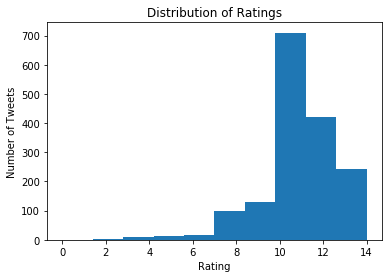

In [379]:
# Plot a histogram of the rating_numerator column
plt.hist(df['rating_numerator'])
plt.xlabel('Rating')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Ratings')
plt.show()

#### finding

Most individuals gave there dogs a rating of 10

### Insight #2: What are the most popular dog breeds?

I can use the dog_breed column to determine which dog breeds are most popular on the platform.

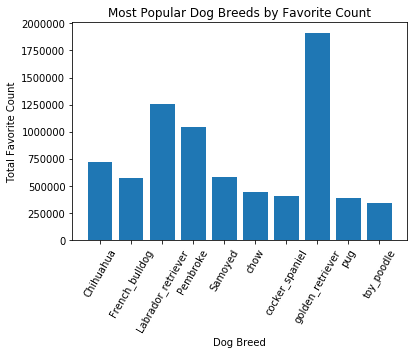

In [380]:
# Group the data by dog breed and calculate the sum of favorite counts for each breed
breed_favorites = df.groupby('dog_breed')['favorite_count'].sum().sort_values(ascending=False).head(10)

# Plot a bar chart of the top 10 breeds
plt.bar(breed_favorites.index, breed_favorites.values)
plt.xlabel('Dog Breed')
plt.ylabel('Total Favorite Count')
plt.title('Most Popular Dog Breeds by Favorite Count')
plt.xticks(rotation=60)
plt.show()

#### finding
The most popular dog breed on the platform is the golden retriever

### Insight #3: what are the most popular dog names?

I can use the name column to determine which dog names are most popular on the platform.

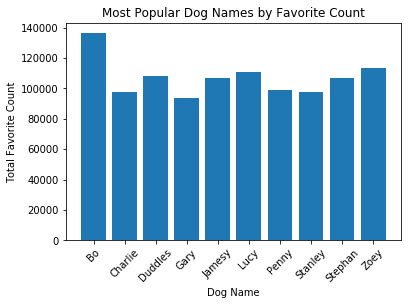

In [381]:
# Group the data by dog name and calculate the sum of favorite counts for each name
name_favorites = df.groupby('name')['favorite_count'].sum().sort_values(ascending=False).head(10)

# Plot a bar chart of the top 10 names
plt.bar(name_favorites.index, name_favorites.values)
plt.xlabel('Dog Name')
plt.ylabel('Total Favorite Count')
plt.title('Most Popular Dog Names by Favorite Count')
plt.xticks(rotation=45)
plt.show()

#### finding
The most popular dog Name on the platform is Bo

### Insight #4:  what are the most popular dog stages?

I can use the stage column to determine which dog stages (e.g., "pupper", "doggo") are most popular on the platform.

In [382]:
stage_favorites = df.groupby('stage')['favorite_count'].sum().sort_values(ascending=False)
stage_favorites

stage
pupper     1251721
doggo      1209866
puppo       450614
floofer      92442
Name: favorite_count, dtype: int64

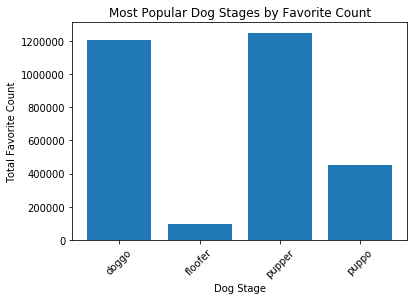

In [383]:
# Group the data by dog stage and calculate the sum of favorite counts for each stage
stage_favorites = df.groupby('stage')['favorite_count'].sum().sort_values(ascending=False)

# Plot a bar chart of the stages
plt.bar(stage_favorites.index, stage_favorites.values)
plt.xlabel('Dog Stage')
plt.ylabel('Total Favorite Count')
plt.title('Most Popular Dog Stages by Favorite Count')
plt.xticks(rotation=45)
plt.show()

#### finding
The most popular dog stage on the platform is pupper with followed 1602179 favorite count by doggo with 1479079

### Insight #5:  Is there a Correlation between retweet count and favorite count?

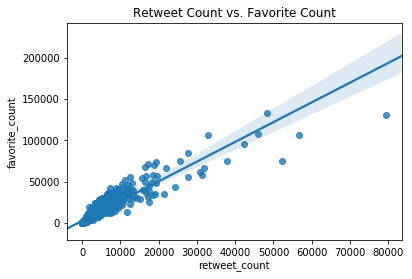

In [384]:
# Plot a scatterplot of retweet count vs. favorite count
sns.regplot(x='retweet_count', y='favorite_count', data=df)
plt.title('Retweet Count vs. Favorite Count')
plt.show()

#### finding
There is a postive correlation between retweet count and favorite count

### Insight #6:  A wordcloud of dog breeds

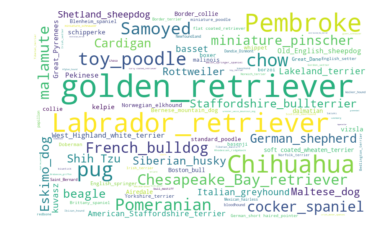

In [385]:
from wordcloud import WordCloud
from PIL import Image


# Create a list of the dog breeds
breeds = df['dog_breed'].tolist()

# Create a string of all the breeds, separated by a space
breed_string = ' '.join(breeds)

# Generate a wordcloud
wordcloud = WordCloud(background_color='white', width=800, height=500).generate(breed_string)

# Show the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
